<a href="https://colab.research.google.com/github/vvilliscool/ML_LIB_Class_Goorm/blob/master/goorm_20220802_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 일변량 통계


In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
cancer = load_breast_cancer()
print(cancer.data.shape)

(569, 30)


In [ ]:
# 고정된 난수를 발생
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 40))
noise.shape

(569, 40)

In [ ]:
# 데이터 노이즈 특성 추가
# 30개는 원본 특성, 다음 40개는 노이즈
X_w_noise = np.hstack([cancer.data, noise])
X_w_noise.shape

(569, 70)

split

In [ ]:
X = X_w_noise  # 입력
y = cancer.target # 출력

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0, test_size=0.3)

In [ ]:
# 50%를 뽑는 것을 학습
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)

## 학습 세트에 적용
X_train_selected = select.transform(X_train)

print( "X_train.shape:", X_train.shape)
print( "X_train_selected.shape", X_train_selected.shape)

X_train.shape: (398, 70)
X_train_selected.shape (398, 35)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False  True  True False False False False False  True False False False
 False False False  True  True False False False False  True False False
 False False False False  True False False False  True  True]


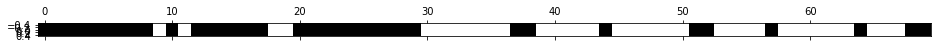

In [ ]:
import matplotlib.pyplot as plt

### 어떤 특성이 선택되었는지 확인
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성 사용(학습) : {:.3f}".format(lr.score(X_train, y_train)))
print("전체 특성 사용(테스트) : {:.3f}".format(lr.score(X_test, y_test)))

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("전체 특성 사용(학습) : {:.3f}".format(knn.score(X_train, y_train)))
print("전체 특성 사용(테스트) : {:.3f}".format(knn.score(X_test, y_test)))

전체 특성 사용(학습) : 0.975
전체 특성 사용(테스트) : 0.936
전체 특성 사용(학습) : 0.940
전체 특성 사용(테스트) : 0.942


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False  True  True False False False False False  True False False False
 False False False  True  True False False False False  True False False
 False False False False  True False False False  True  True]
(171, 35)
일부 특성 사용(학습) : 0.950
일부 특성 사용(테스트): 0.942


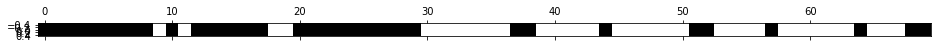

In [ ]:
## X_train_selected
select = SelectPercentile(score_func=f_classif,
                          percentile=50)
select.fit(X_train, y_train)

### 학습 세트에 적용
X_train_selected = select.transform(X_train)

mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

X_test_selected = X_test[ :  , mask ]

print(X_test_selected.shape)
lr.fit(X_train_selected, y_train)
print("일부 특성 사용(학습) : {:.3f}".format(lr.score(X_train_selected, y_train)))
print("일부 특성 사용(테스트): {:.3f}".format(lr.score(X_test_selected, y_test)))

## 모델기반 특성 선택

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                                               threshold="median")

In [ ]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape :" , X_train.shape)
print("X_train_l1.shape :", X_train_l1.shape)

X_train.shape : (398, 70)
X_train_l1.shape : (398, 35)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False False False False False False False  True False False
 False False False  True  True False False False False False False False
 False False  True False False False False False  True False]


Text(0.5, 0, '특성 번호')

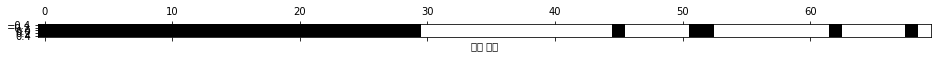

In [ ]:
### 어떤 특성이 선택되었는지 확인
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")

Text(0.5, 0, '특성 번호')

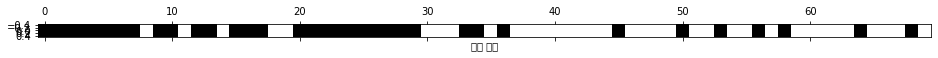

In [ ]:
select.fit(X_test, y_test)
X_test_l1 = select.transform(X_test)

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")

### 일변량 통계를 이용한 변수 선택
- 통계 F-value 이용
    - select = SelectPercentile(score_func = f_classif, percentile=50)
    - 분류 : f_classif
    - 회귀 : f_regression
    - percentile : 얼마나 변수를 선택할 것인가 (%)


### 모델기반 변수 선택
- 모델을 기반으로 변수 선택
    - RandomForestCalssifier를 이용하는 경우
    - 기준이 되는 값은 특성 중요도
        - 특성 중요도 : 모델을 만들때, 사용된 변수를 말함
        - select = SelectFromModel(RandomForestClassifier(), threshold='median')

Text(0.5, 0, '특성 번호')

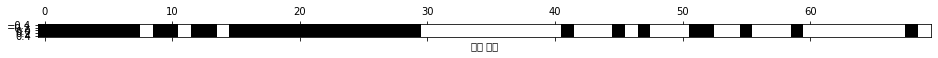

In [ ]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
                  n_features_to_select=35)

select.fit(X_train, y_train)

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")

In [17]:
X_train_rfe = select.transform(X_train)
mask = select.get_support()

model = LogisticRegression().fit(X_train_rfe, y_train)
score = model.score(X_train_rfe, y_train)
print("학습용 평가 점수 : {:.3f}".format(score))

X_test_rfe = X_test[:, mask]
score = model.score(X_test_rfe, y_test)
print("테스트용 평가 점수 : {:.3f}".format(score))

학습용 평가 점수 : 0.947
테스트용 평가 점수 : 0.947
